<a href="https://colab.research.google.com/github/ulfanuroktaviana575/Image-Retrieval_261_235/blob/main/Open_CV_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Aritmetic

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test/No_findings/00001323_001.png"
}

In [5]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [6]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


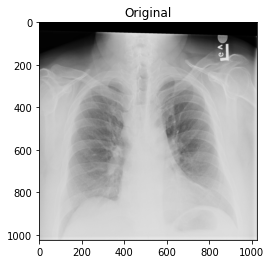

In [7]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

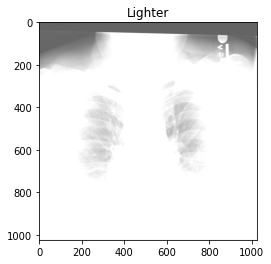

In [8]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

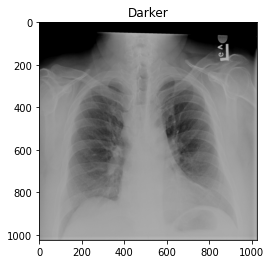

In [9]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

# Cropping

In [10]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [11]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [12]:
I = np.arange(0, 25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [13]:
I = I.reshape((5, 5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [14]:
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [15]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

In [16]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test/No_findings/00001323_001.png"
}

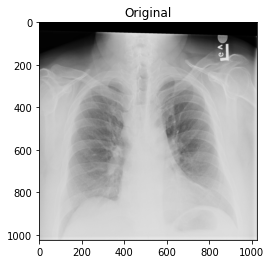

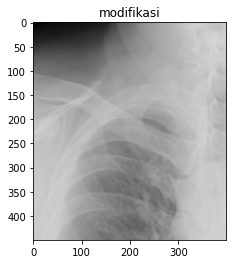

In [17]:
# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the monitor from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
# Dimension lab.jpeg = 720x1600
No_findings = image[100:550, 100:500]
plt_imshow("modifikasi", No_findings)

# Drawing

In [18]:

def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [19]:
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

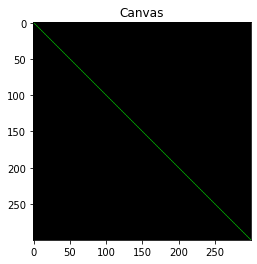

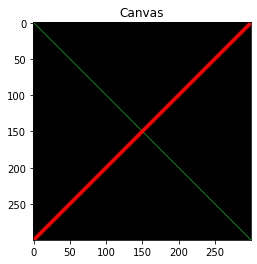

In [21]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

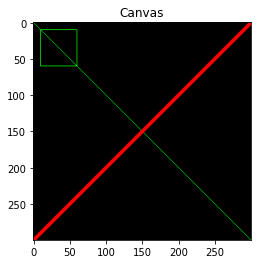

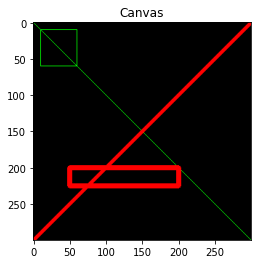

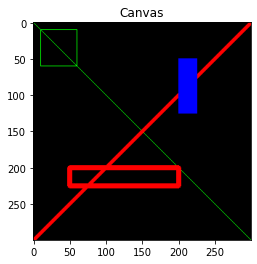

In [22]:

# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

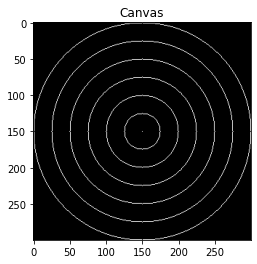

In [23]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

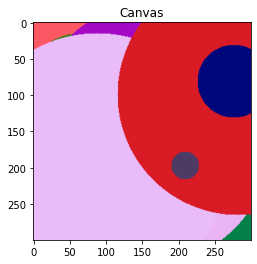

In [24]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

In [25]:

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test/No_findings/00001323_001.png"
}

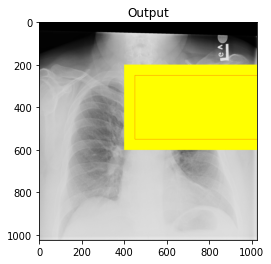

In [26]:
# load the input image from disk
image = cv2.imread(args["image"])

cv2.rectangle(image, (400, 200), (1200, 600), (0, 255, 255), -1)
cv2.rectangle(image, (450, 250), (1150, 550), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)

# Flipping

In [27]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [28]:
args = {
	"image": "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test/No_findings/00001323_001.png"
}

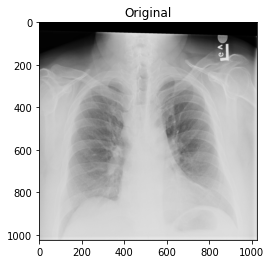

[INFO] flipping image horizontally...


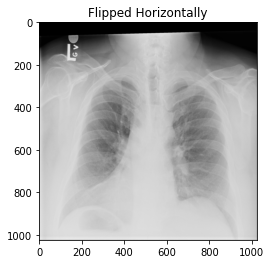

In [29]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


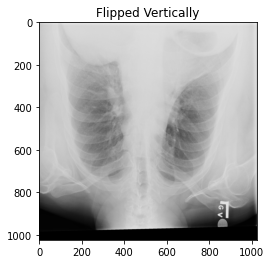

In [30]:
# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


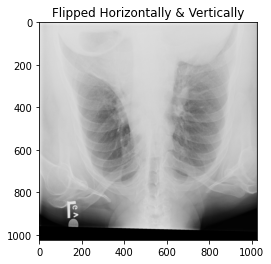

In [31]:
# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

# Masking

In [32]:

def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [33]:
args = {
	"image": "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test/No_findings/00001323_001.png"
}

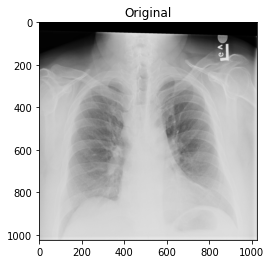

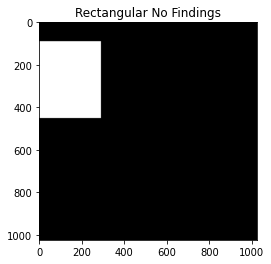

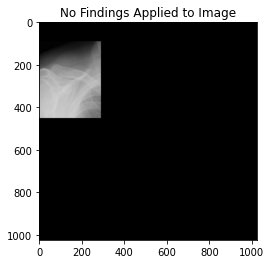

In [34]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular No Findings", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("No Findings Applied to Image", masked)

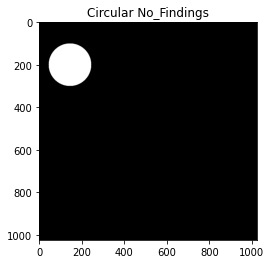

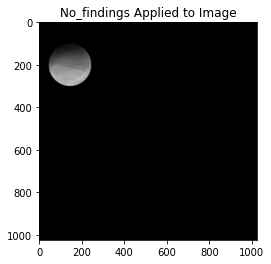

In [35]:

# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular No_Findings", mask)
plt_imshow("No_findings Applied to Image", masked)

# Pixel

In [36]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [37]:
args = {
	"image": "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test/No_findings/00001323_001.png"
}

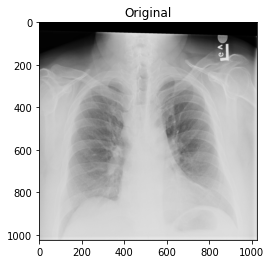

In [38]:

# load the image, grab its spatial dimensions (width and height),
# and then display the original image to our screen
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [39]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 0, Green: 0, Blue: 0
Pixel at (50, 20) - Red: 0, Green: 0, Blue: 0
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


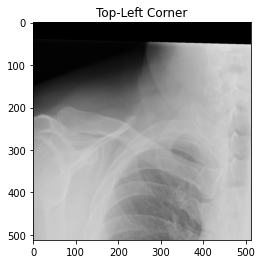

In [40]:

# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

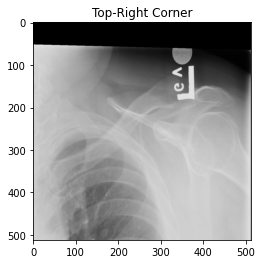

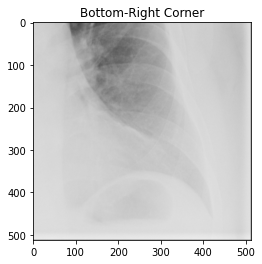

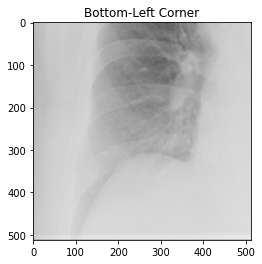

In [41]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

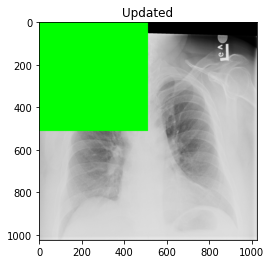

In [42]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)